In [ ]:
%load_ext autoreload
%autoreload 2

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from waymo_object import kitti_object, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes


In [29]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

Notebook initialized with ipy backend.


In [30]:
from avcv.utils import *

In [31]:
data_root = '/Pseudo_Lidar_V2/waymo_kitti_converter/data/waymo/'

In [99]:
paths = glob('/data/waymo/training_kitti/calib/*.txt')

# paths = list(sorted(paths))

# def to_new_name(path):
#     dir_path = os.path.dirname(path)
#     name = int(os.path.basename(path).split('.')[0])
#     ext = os.path.basename(path).split('.')[1]
#     new_name = f'{name:07d}.'+ext
#     return os.path.join(dir_path, new_name)

# for path in tqdm(paths):
#     os.rename(path, to_new_name(path))

out_train_txt = '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/train.txt'
out_val_txt = '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/val.txt'
if os.path.exists(out_train_txt):
    os.remove(out_train_txt)
    os.remove(out_val_txt)


os.makedirs(os.path.dirname(out_train_txt), exist_ok=True)
# with open(out_train_txt, 'w') as f:

f = open(out_train_txt, 'w')
f_val = open(out_val_txt, 'w')


for i, path in enumerate(paths):
    name = os.path.basename(path).split('.')[0]
    if i<(0.9*len(paths)):
        f.write(f'{name}\n')
    else:
        f_val.write(f'{name}\n')
        
f.close()
f_val.close()

In [100]:
# len(paths)

In [101]:
!cat /fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo/val.txt

009165
007055
004065
004049
008073
007188
003031
002152
004175
002016
007068
004146
001096
001024
006179
000158
002116
008040
008097
001061
004138
008063
006072
007177
009097
006043
007145
005182
006156
009112
002092
007185
001159
000148
006114
005009
004188
006150
009003
003138
008127
006083
006108
004196
005083
009083
005092
009027
004121
002099
006070
007076
002121
000174
003126
006055
009151
001144
008140
007154
008191
007090
009114
008053
000033
002168
006132
006109
000072
006000
007043
002025
003040
009084
007115
001187
008124
001035
002060
005187
002139
008081
009059
004143
001184
000031
006155
006095
009094
000026
004129
001027
002195
007171
003104
003042
009113
006131
001111
004047
000097
005084
003046
003077
009108
000157
000107
005148
004032
005159
007130
007148
000168
005012
002043
005072
007044
004060
009162
004148
007116
000167
006130
003013
001005
007153
004192
007140
001146
004183
002142
007104
009080
001036
001004
000172
005024
005090
003125
001158
007189
000039
008158

In [ ]:
data_root = '/fisheye_object/3dod/RTM3d-official/kitti_format/data/waymo'

In [56]:
# dataset = kitti_object('../data/object', 'training')
dataset = kitti_object(data_root, 'training', camera_name=1)

data_idx = 0
objects = dataset.get_label_objects(data_idx)
# objects = dataset.get_pred_objects(data_idx)
pc_velo = dataset.get_lidar(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape

fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
fig_3d

/Pseudo_Lidar_V2/waymo_kitti_converter/data/waymo/ training
/Pseudo_Lidar_V2/waymo_kitti_converter/data/waymo/training/velodyne/0000000.bin
('All point num: ', 183680)
('FOV point num: ', (21332, 4))
pc_velo (21332, 4)
==================== (21332, 4)
box3d_pts_3d_velo:
[[35.21426532 -1.85267957  2.17471257]
 [34.71109846 -4.16822712  2.21901409]
 [28.71117554 -2.86423355  2.23022677]
 [29.2143424  -0.548686    2.18592526]
 [35.23267842 -1.79546848  5.37414812]
 [34.72951156 -4.11101604  5.41844964]
 [28.72958864 -2.80702247  5.42966233]
 [29.2327555  -0.49147492  5.38536081]]
box3d_pts_3d_velo:
[[46.29216059 -3.77809312  2.94552874]
 [45.96738779 -5.7410643   2.98249894]
 [41.40940746 -4.98670827  2.9952415 ]
 [41.73418027 -3.0237371   2.9582713 ]
 [46.30556762 -3.7364363   5.27511775]
 [45.98079482 -5.69940748  5.31208795]
 [41.4228145  -4.94505145  5.32483051]
 [41.7475873  -2.98208028  5.28786031]]
box3d_pts_3d_velo:
[[-4.46536584e+01  1.39473880e+01 -1.08603686e-01]
 [-4.29080017e+

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xc2\x08\x02\x00\x00\x00\x98\x01:\x9…

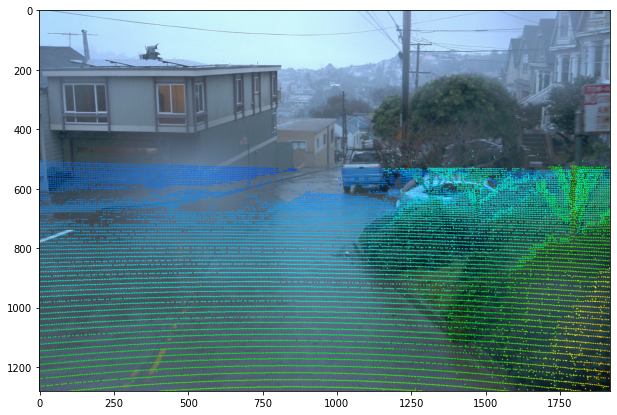

In [36]:
img_lidar = show_lidar_on_image(pc_velo[:, :3], img, calib, img_width, img_height)
img_lidar = cv2.cvtColor(img_lidar, cv2.COLOR_BGR2RGB)

fig_lidar = plt.figure(figsize=(14, 7))
ax_lidar = fig_lidar.subplots()
ax_lidar.imshow(img_lidar)
plt.show()

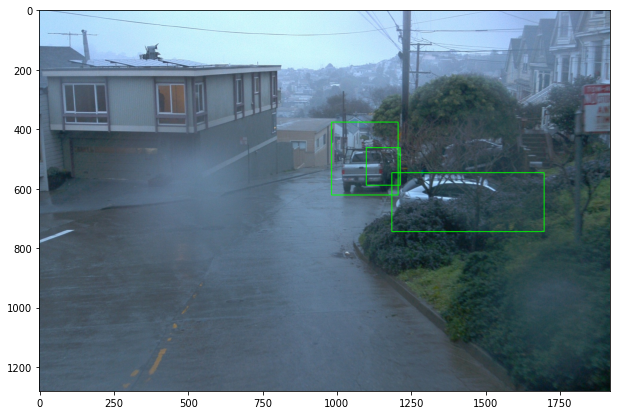

In [37]:
img_bbox2d, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox2d = cv2.cvtColor(img_bbox2d, cv2.COLOR_BGR2RGB)

fig_bbox2d = plt.figure(figsize=(14, 7))
ax_bbox2d = fig_bbox2d.subplots()
ax_bbox2d.imshow(img_bbox2d)
plt.show()

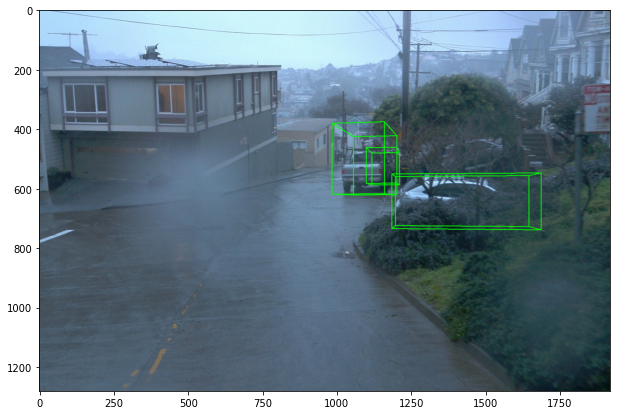

In [38]:
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()

top_image: (500, 300, 3)


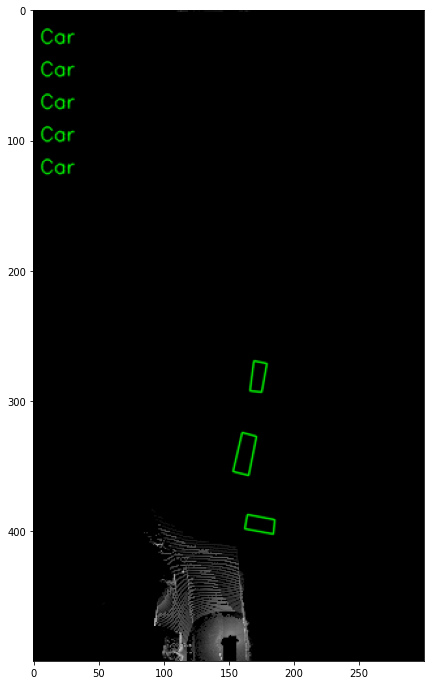

In [39]:
img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

fig_bev = plt.figure(figsize=(7, 14))
ax_bev = fig_bev.subplots()
ax_bev.imshow(img_bev)
plt.show()

In [ ]:
!